# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = 'f04523f9f391ff062183a1102f854f3d'
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+api_key

#List of city data
city_data = []

print('Beginning Data Retrieval')
print('-------------------------------')

Beginning Data Retrieval
-------------------------------


In [4]:
#Request data for the cities
for city in cities:
    city_url='http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+api_key+'&q='+city
    print('Processing record | ', city)
    
#Loop through the cities
    try:
        response = requests.get(city_url).json()
        
        #Variables for the data
        #city_lat = response['coord']['lat']
        #city_temp = response['main']['temp_max']
        #city_humid = response['main']['humidity']
        #city_cloud = response['clouds']['all']
        #city_wind = response['wind']['speed']
        
        #Append the data to the city_data list
        city_data.append({'City':city,
                        'Latitude':city_lat,
                        'Temperature':city_temp,
                        'Humidity':city_humid,
                        'Cloudiness':city_cloud,
                        'Wind_Speed':city_wind}) 
    except:
        print('City not found. Skipping...')
    #break
    pass        
        
#Print log
print('----------------------------------')
print('Data Retrieval Complete')
print('----------------------------------')





Processing record |  yizheng
Processing record |  bluff
Processing record |  illoqqortoormiut
City not found. Skipping...
Processing record |  punta arenas
Processing record |  panguna
Processing record |  belushya guba
City not found. Skipping...
Processing record |  arraial do cabo
Processing record |  praia
Processing record |  vaini
Processing record |  bitung
Processing record |  lebu
Processing record |  vao
Processing record |  araouane
Processing record |  sao joao da barra
Processing record |  kalmunai
Processing record |  hithadhoo
Processing record |  sechura
Processing record |  busselton
Processing record |  tucurui
Processing record |  koumac
Processing record |  belmonte
Processing record |  port blair
Processing record |  pasil
Processing record |  namatanai
Processing record |  laurentides
Processing record |  college
Processing record |  taolanaro
City not found. Skipping...
Processing record |  talcahuano
Processing record |  qaanaaq
Processing record |  ugoofaaru
Pr

Processing record |  yeppoon
Processing record |  sayat
Processing record |  conceicao do araguaia
Processing record |  moerai
Processing record |  kupang
Processing record |  iqaluit
Processing record |  sao miguel do araguaia
Processing record |  sinkat
City not found. Skipping...
Processing record |  batagay
Processing record |  burgeo
Processing record |  vanimo
Processing record |  caravelas
Processing record |  boende
Processing record |  berdigestyakh
Processing record |  katobu
Processing record |  port elizabeth
Processing record |  edmonton
Processing record |  tukrah
City not found. Skipping...
Processing record |  manavgat
Processing record |  chuy
Processing record |  biak
Processing record |  bria
Processing record |  olafsvik
City not found. Skipping...
Processing record |  saldanha
Processing record |  muborak
Processing record |  bari
City not found. Skipping...
Processing record |  ko samui
Processing record |  cloquet
Processing record |  ouadda
Processing record |  

Processing record |  foso
Processing record |  orlovskiy
Processing record |  mumford
Processing record |  grimshaw
Processing record |  coos bay
Processing record |  koutsouras
Processing record |  severo-yeniseyskiy
Processing record |  cazaje
City not found. Skipping...
Processing record |  wanning
Processing record |  vicuna
City not found. Skipping...
Processing record |  navirai
Processing record |  melfi
Processing record |  toliary
City not found. Skipping...
Processing record |  muyezerskiy
Processing record |  gashua
Processing record |  nizhnevartovsk
Processing record |  san ramon
Processing record |  pitimbu
Processing record |  antofagasta
Processing record |  utiroa
City not found. Skipping...
Processing record |  sarkand
Processing record |  fort-shevchenko
Processing record |  faya
Processing record |  chapais
Processing record |  tucuman
Processing record |  palmer
Processing record |  baniachang
Processing record |  katherine
Processing record |  acaponeta
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#city_data_df = city_data
city_data_df = pd.DataFrame(city_data)
city_data_df.head()


,City,Cloudiness,Humidity,Latitude,Temperature,Wind_Speed
0,yizheng,6,79,24.67,67.37,1.57
1,bluff,88,45,-23.58,73.85,3.78
2,punta arenas,0,93,-53.16,35.60,13.87
3,panguna,84,72,-6.32,85.01,8.95
4,arraial do cabo,3,75,-22.97,73.85,4.65


In [6]:
#Save city data to a csv file
city_weather = city_data_df.to_csv('City_weather.csv', index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

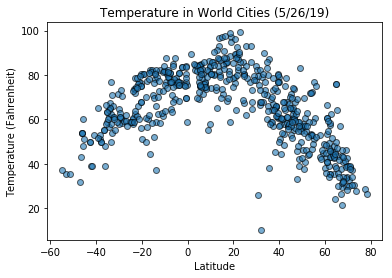

In [13]:
#Plot the temperatures and save image to file
plt.scatter(city_data_df.Latitude,city_data_df.Temperature, edgecolor='black', alpha=.6)
plt.title('Temperature in World Cities (5/26/19)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
plt.savefig('Temperatures.png')

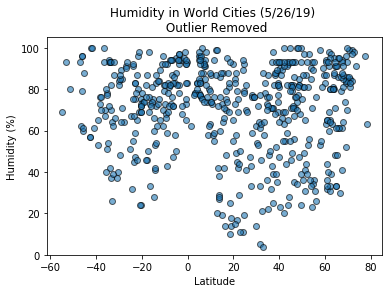

In [17]:
#Plot the humidity and save image to file
plt.scatter(city_data_df.Latitude,city_data_df.Humidity, edgecolor='black', alpha=.6)
plt.ylim(0,105)
plt.title('Humidity in World Cities (5/26/19) \n Outlier Removed')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Humidity-no outlier.png')

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

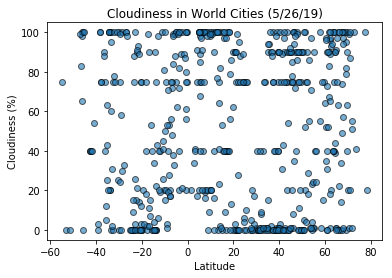

In [19]:
#Plot the cloudiness and save image to file
plt.scatter(city_data_df.Latitude,city_data_df.Cloudiness, edgecolor='black', alpha=.6)
plt.title('Cloudiness in World Cities (5/26/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Cloudiness.png')

#### Latitude vs. Wind Speed Plot

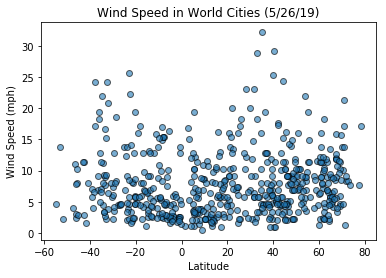

In [20]:
#Plot the wind speed and save image to file
plt.scatter(city_data_df.Latitude,city_data_df.Wind_Speed, edgecolor='black', alpha=.6)
plt.title('Wind Speed in World Cities (5/26/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Wind_Speed.png')